## Importing Needed Packages

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
import seaborn as sns

### Read dataset

In [21]:
df = pd.read_csv('./data/house_price.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Data Exploration

#### General Information
##### Here we notice that only in the address column there is empty information that needs to be processed

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


#### General Description
##### which shows the additional description only for the room and the price because the others do not have numerical type and must be converted

In [23]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


#### Columns Name

In [24]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

#### Shape Dataset

In [25]:
df.shape

(3479, 8)

#### Number of unique data

In [26]:
df.nunique()

Area          243
Room            6
Parking         2
Warehouse       2
Elevator        2
Address       192
Price         934
Price(USD)    932
dtype: int64

### Drop null cells in the address

In [27]:
check_nan = df['Address'].isnull().values.any()
check_nan

True

#### count of null in address

In [28]:
count_nan = df['Address'].isnull().sum()
count_nan

23

#### Drop the null data

In [29]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


#### Check null in address

#### Now we have to process the type of the columns, because for example, the area column should be a number, but it is an object, so there is a problem in some cells, and also in other columns, such as parking, etc., the type should be changed and converted to a number.

#### If we want to change the type of the area, we get an error because it has strings in the information, so we first delete them and then change the type.

In [30]:
# df['Area'] = df['Area'].astype('int64')

#### With the following code, we can find out which lines have problems in the area column and see the same cells
#### And we see that they are not only strings but also outliers

In [31]:
unreasonable_numeric_area = df[~df['Area'].str.isnumeric()]
unreasonable_numeric_area

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
570,"3,310,000,000",2,True,True,True,Ostad Moein,3.310000e+09,110333.33
709,"16,160,000,000",3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,"1,000",2,True,True,False,Damavand,7.000000e+09,233333.33
1604,"8,400,000,000",2,True,True,True,Gheitarieh,8.700000e+09,290000.00
2171,"3,600",2,False,False,False,Shahryar,9.720000e+09,324000.00
2802,"2,550,000,000",2,True,True,True,Central Janatabad,2.550000e+09,85000.00


#### Now we drop those cells and then change the type

In [32]:
df.drop(df[~df['Area'].str.isnumeric()].index , inplace=True)
df['Area'] = df['Area'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   int64  
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 171.8+ KB


#### Replace boolian data in parking,warehouse,elevator and address to number

In [33]:
label_encoder = LabelEncoder()

df['Parking'] = label_encoder.fit_transform(df['Parking'])
df['Warehouse'] = label_encoder.fit_transform(df['Warehouse'])
df['Elevator'] = label_encoder.fit_transform(df['Elevator'])
df['Address'] = label_encoder.fit_transform(df['Address'])


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   int64  
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   int64  
 3   Warehouse   3450 non-null   int64  
 4   Elevator    3450 non-null   int64  
 5   Address     3450 non-null   int64  
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 242.6 KB


In [35]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33


#### boxplot for check outlier area

Text(0.5, 1.0, 'Ares vs Price')

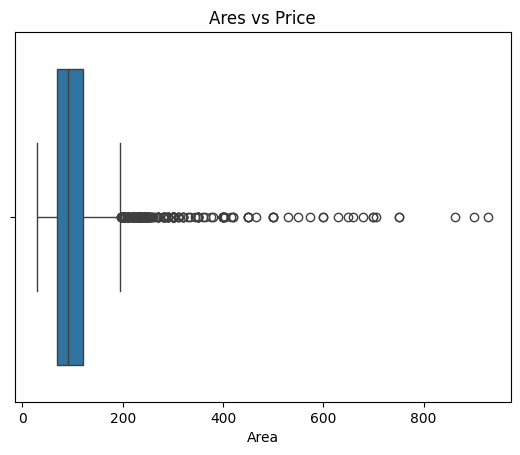

In [38]:
sns.boxplot(x = 'Area', data = df).set_title('Ares vs Price')

#### Remove outlier area

In [39]:
def remove_area_outlier(df , min_w , max_w):
    df = pd.DataFrame(df)
    df = df[(df['Area'] >= min_w) & (df['Area'] <= max_w)]
    return df

df = remove_area_outlier(df , 0 , 600)
print(df['Area'])

0        63
1        60
2        79
3        95
4       123
       ... 
3474     86
3475     83
3476     75
3477    105
3478     82
Name: Area, Length: 3438, dtype: int64


#### normalaiez all data

In [41]:
def normalize(df , columns):
    scaler = MinMaxScaler()
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = columns

    return df

df = normalize(df , ['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price', 'Price(USD)'])
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,0.057895,0.2,1.0,1.0,1.0,0.816754,0.019983,0.019983
1,0.052632,0.2,1.0,1.0,1.0,0.816754,0.019983,0.019983
2,0.085965,0.4,1.0,1.0,1.0,0.612565,0.005914,0.005914
3,0.114035,0.4,1.0,1.0,1.0,0.795812,0.009729,0.009729
4,0.163158,0.4,1.0,1.0,1.0,0.785340,0.075722,0.075722


### separating the required data

In [51]:
cdf = df[['Area', 'Room', 'Parking', 'Elevator', 'Address', 'Warehouse', 'Price', 'Price(USD)']]
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3438 non-null   float64
 1   Room        3438 non-null   float64
 2   Parking     3438 non-null   float64
 3   Elevator    3438 non-null   float64
 4   Address     3438 non-null   float64
 5   Warehouse   3438 non-null   float64
 6   Price       3438 non-null   float64
 7   Price(USD)  3438 non-null   float64
dtypes: float64(8)
memory usage: 215.0 KB


##### With the correlation analysis, we realize that the address is not correlated with the price and we can not use the address in the model.

In [55]:
cdf.corr()

,Area,Room,Parking,Elevator,Address,Warehouse,Price,Price(USD)
Area,1.000000,0.736837,0.227666,0.118449,-0.132118,0.088864,0.750759,0.750759
Room,0.736837,1.000000,0.273608,0.194918,-0.073605,0.126783,0.574389,0.574389
Parking,0.227666,0.273608,1.000000,0.433751,0.023711,0.430476,0.206460,0.206460
Elevator,0.118449,0.194918,0.433751,1.000000,0.070513,0.203778,0.146155,0.146155
Address,-0.132118,-0.073605,0.023711,0.070513,1.000000,0.019275,-0.077557,-0.077557
Warehouse,0.088864,0.126783,0.430476,0.203778,0.019275,1.000000,0.122858,0.122858
Price,0.750759,0.574389,0.206460,0.146155,-0.077557,0.122858,1.000000,1.000000
Price(USD),0.750759,0.574389,0.206460,0.146155,-0.077557,0.122858,1.000000,1.000000


#### Plot Correlation

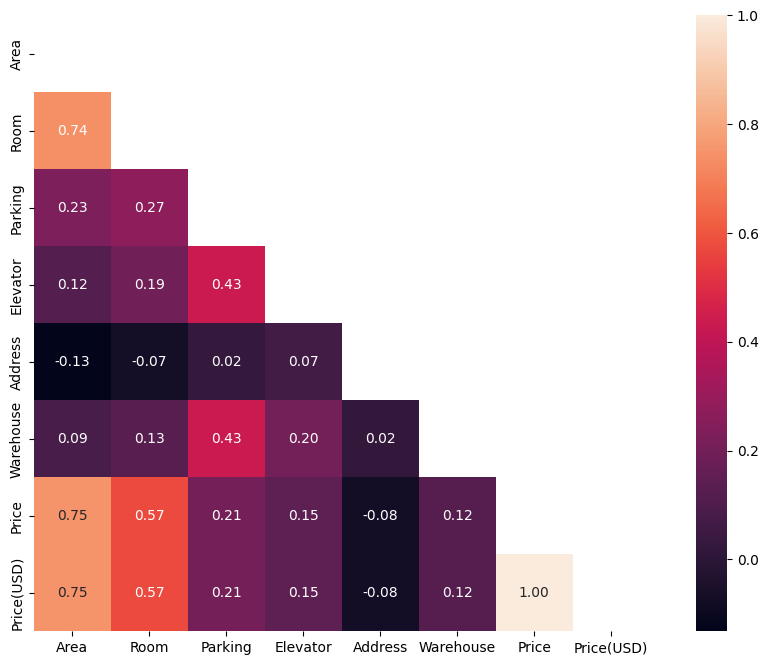

In [56]:
plt.figure(figsize=(12,8))
corr = cdf.corr()
mask = np.triu(corr)
sns.heatmap(corr, square=True, mask=mask, annot=True, fmt='.2f')
plt.show()

## Visualize
#### Scatter plot with address

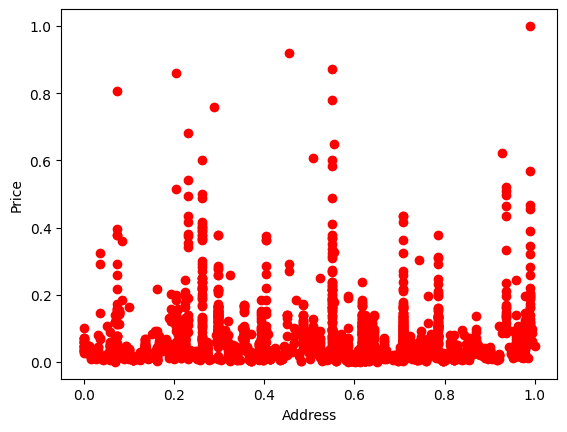

In [53]:
plt.scatter(cdf.Address , cdf.Price , color='red')
plt.xlabel('Address')
plt.ylabel('Price')
plt.show()

#### Scatter plot with area

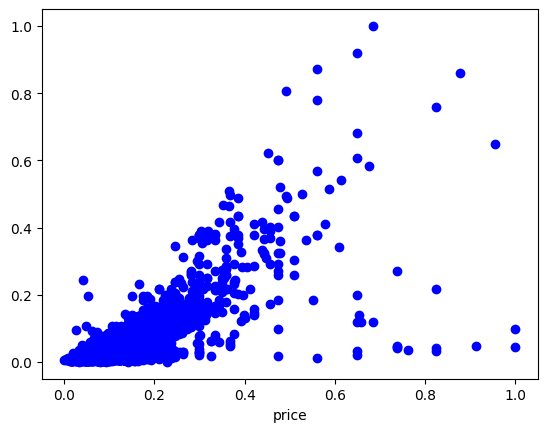

In [54]:
plt.scatter(cdf.Area , cdf.Price , color='blue')
plt.xlabel('Area')
plt.xlabel('price')
plt.show()

#### Scatter plot with room

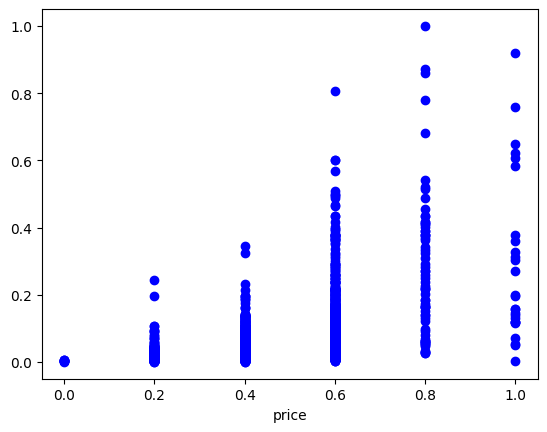

In [65]:
plt.scatter(cdf.Room , cdf.Price , color='blue')
plt.xlabel('Room')
plt.xlabel('price')
plt.show()

## Model
### Select the feature and then split the train and test

In [78]:
X = cdf[['Area', 'Room', 'Parking', 'Elevator', 'Warehouse']]
y = cdf[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print("------------------------")
print(y.shape)
print(y_train.shape)
print(y_test.shape)


(3438, 5)
(2750, 5)
(688, 5)
------------------------
(3438, 1)
(2750, 1)
(688, 1)


### Create regression model

In [79]:
model = LinearRegression()

### Training the model

In [80]:
model.fit(X_train, y_train)

LinearRegression()

### Using the model to predict the test data

In [81]:
y_pred = model.predict(X_test)

#### Intercept and coef

In [82]:
print(f"model intercept: {model.intercept_}")       # theta 0
print(f"model coef: {model.coef_}")                 # theta 1,2,3,4,5

model intercept: [-0.04786301]
model coef: [[ 0.53927313  0.03253947 -0.00146265  0.01010057  0.01431497]]


### Calculate the mean squared error and r2-squared

In [83]:
# mse
mse = mean_squared_error(y_test, y_pred)

# r2
r2 = r2_score(y_test, y_pred)

# show result
print(f'Mean Square Error: {mse}')
print(f'r-square: {r2}')



Mean Square Error: 0.002700523645182856
r-square: 0.6337935146961727
